In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

Analysis of different models plan
- Logistic regression with all features
- Logistic regression with feature selection
- CART with default parameters
- CART with cross validation
- Random forest with cross validation
- Boosted trees with cross validation
- Neural network with Keras

# EDA

In [113]:
# Load csv into dataframe
df = pd.read_csv('data/data.csv')
df.head()

,customer_number,stage_grouped,max_closed_date,cloud_revenue,total_opp_amount,employees,mk_fit_score,industry,ee_count,contacts_count,...,part_request_events,part_request_days_used,share_events,share_days_used,tasks_events,tasks_days_used,version_control_events,version_control_days_used,web_review_events,web_review_days_used
0,25758,won,6/14/2024,168870.00,875000.03,823,0,Aerospace,44,187,...,0,0,3,2,0,0,4481,167,4163,108
1,26355,won,6/27/2024,26215.25,21215.25,0,0,Automotive,22,107,...,2170,136,500,84,6,5,27953,167,49924,158
2,1852761,won,9/3/2024,35499.98,146978.99,0,0,Aerospace,0,0,...,1,1,2,2,0,0,3070,119,750,66
3,1718599,won,6/26/2024,0.00,81245.99,300,0,Industrial/Instrumentation,6,43,...,0,0,114,36,0,0,8732,141,9897,127
4,940662,won,6/27/2024,0.00,26970.00,8,0,Industrial/Instrumentation,0,3,...,0,0,1,1,0,0,2229,61,172,5


In [114]:
# Summarize the data
df.describe()

,customer_number,cloud_revenue,total_opp_amount,employees,mk_fit_score,ee_count,contacts_count,non_ee_count,emb_world_attendees,email_clicks,...,part_request_events,part_request_days_used,share_events,share_days_used,tasks_events,tasks_days_used,version_control_events,version_control_days_used,web_review_events,web_review_days_used
count,1.011000e+03,1.011000e+03,1.011000e+03,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,...,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000
mean,1.277606e+06,8.456697e+03,2.364560e+04,820.454006,9.236400,6.614243,35.357072,11.282888,0.001978,20.346192,...,29.558853,4.521266,41.973294,7.590504,52.022750,8.544016,4050.583581,76.187933,5196.910979,62.670623
std,6.181956e+05,4.056644e+04,6.200247e+04,5364.787208,23.588353,8.318746,69.921102,15.496250,0.044455,77.931557,...,164.287695,14.165231,158.948146,13.646255,187.147034,19.032406,8168.057594,59.073174,10044.085899,57.152994
min,1.132500e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.679345e+05,4.958000e+02,1.200000e+03,0.000000,0.000000,1.000000,8.000000,2.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.500000,5.000000,28.000000,4.000000
50%,1.540724e+06,1.253990e+03,8.797000e+03,8.000000,0.000000,4.000000,20.000000,7.000000,0.000000,7.000000,...,1.000000,1.000000,5.000000,2.000000,0.000000,0.000000,1252.000000,85.000000,970.000000,50.000000
75%,1.796833e+06,8.000000e+03,2.846918e+04,80.000000,0.000000,9.000000,39.000000,14.000000,0.000000,19.000000,...,4.000000,3.000000,27.000000,9.000000,15.000000,6.000000,4825.000000,128.500000,6096.500000,120.000000
max,1.958050e+06,1.218750e+06,1.297890e+06,114200.000000,96.000000,71.000000,1080.000000,136.000000,1.000000,2091.000000,...,2170.000000,136.000000,2976.000000,126.000000,2655.000000,136.000000,118682.000000,179.000000,95420.000000,181.000000


# Logistic Regression

## All features

In [115]:
# Add column converting stage_grouped to a 0/1
df['stage_grouped_num'] = df['stage_grouped'].apply(lambda x: 1 if x == 'won' else 0)
df.head()

,customer_number,stage_grouped,max_closed_date,cloud_revenue,total_opp_amount,employees,mk_fit_score,industry,ee_count,contacts_count,...,part_request_days_used,share_events,share_days_used,tasks_events,tasks_days_used,version_control_events,version_control_days_used,web_review_events,web_review_days_used,stage_grouped_num
0,25758,won,6/14/2024,168870.00,875000.03,823,0,Aerospace,44,187,...,0,3,2,0,0,4481,167,4163,108,1
1,26355,won,6/27/2024,26215.25,21215.25,0,0,Automotive,22,107,...,136,500,84,6,5,27953,167,49924,158,1
2,1852761,won,9/3/2024,35499.98,146978.99,0,0,Aerospace,0,0,...,1,2,2,0,0,3070,119,750,66,1
3,1718599,won,6/26/2024,0.00,81245.99,300,0,Industrial/Instrumentation,6,43,...,0,114,36,0,0,8732,141,9897,127,1
4,940662,won,6/27/2024,0.00,26970.00,8,0,Industrial/Instrumentation,0,3,...,0,1,1,0,0,2229,61,172,5,1


In [117]:
# Drop customer_number, stage_grouped, max_closed_date, cloud_revenue, total_opp_amount from the dataframe
X = df.drop(['customer_number', 'stage_grouped', 'max_closed_date', 'cloud_revenue', 'total_opp_amount', 'stage_grouped_num'], axis=1)
y = df['stage_grouped_num']
print(X.shape, y.shape)

(1011, 34) (1011,)


In [118]:
# Perform one-hot encoding on the 'industry' column
X = pd.get_dummies(X, columns=['industry'], drop_first=True)
X.head()

,employees,mk_fit_score,ee_count,contacts_count,non_ee_count,emb_world_attendees,email_clicks,a365_new_wb_visits,a365_rest_wb_visits,total_webinars_attended,...,industry_Manufacturing,industry_Maritime,industry_Medical Device,industry_Medical Devices,industry_Military/Defense,industry_Other,industry_Retail,industry_Service Bureau / Engineering Services,industry_Technology,industry_Telecommunications
0,823,0,44,187,76,0,10,0,33,0,...,False,False,False,False,False,False,False,False,False,False
1,0,0,22,107,28,0,85,3,27,7,...,False,False,False,False,False,False,False,False,False,False
2,0,0,0,0,0,0,2,0,2,0,...,False,False,False,False,False,False,False,False,False,False
3,300,0,6,43,12,0,28,3,166,2,...,False,False,False,False,False,False,False,False,False,False
4,8,0,0,3,2,0,2,0,11,0,...,False,False,False,False,False,False,False,False,False,False


In [97]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(707, 59) (304, 59) (707,) (304,)


In [98]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape, X_test.shape)

(707, 59) (304, 59)


In [99]:
# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[129  36]
 [ 95  44]]


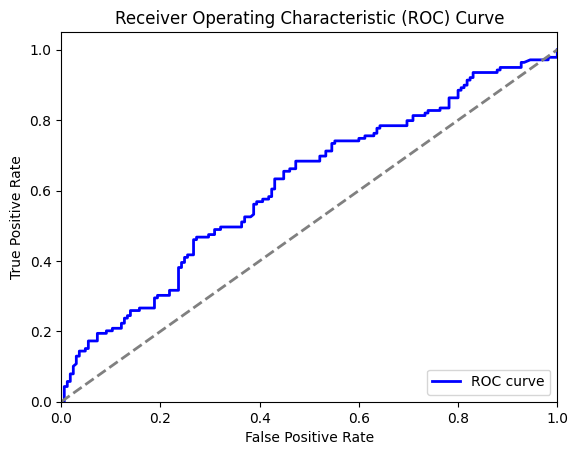

AUC: 0.6138652714192282


In [101]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

In [102]:
# Get the logistic regression coefficients
coefficients = logistic_model.coef_[0]

# Create a DataFrame to display the coefficients with their corresponding feature names
coeff_df = pd.DataFrame(coefficients, X.columns, columns=['Coefficient'])
# Sort the values by the coefficient value
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)
print(coeff_df)

                                                 Coefficient
libs_days_used                                      0.391178
industry_Aerospace                                  0.325046
industry_Industrial/Instrumentation                 0.238802
version_control_days_used                           0.220728
industry_Telecommunications                         0.219715
total_webinar_attendees                             0.213776
comms_events                                        0.208706
tasks_days_used                                     0.197501
industry_Electronic Component and Semiconductor     0.190926
emb_world_attendees                                 0.188717
assembly_app_events                                 0.172530
non_ee_count                                        0.168204
multi_cad_events                                    0.165745
industry_Maritime                                   0.161950
part_request_days_used                              0.154131
multi_cad_days_used     

TODO: Check significance of coefficients and try with cross validation.

## Better feature selection

In [103]:
corr_matrix = X.corr()

# See anything with correlation > 0.6 or < -0.6
corr_matrix[(corr_matrix > 0.4) | (corr_matrix < -0.4)]

# Highly correlated features
# - ee_count / contacts_count / non_ee_count
# - total_webinars_attended / total_webinars_attendees

,employees,mk_fit_score,ee_count,contacts_count,non_ee_count,emb_world_attendees,email_clicks,a365_new_wb_visits,a365_rest_wb_visits,total_webinars_attended,...,industry_Manufacturing,industry_Maritime,industry_Medical Device,industry_Medical Devices,industry_Military/Defense,industry_Other,industry_Retail,industry_Service Bureau / Engineering Services,industry_Technology,industry_Telecommunications
employees,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mk_fit_score,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ee_count,NaN,NaN,1.000000,0.657774,0.750457,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contacts_count,NaN,NaN,0.657774,1.000000,0.723469,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
non_ee_count,NaN,NaN,0.750457,0.723469,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emb_world_attendees,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
email_clicks,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a365_new_wb_visits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a365_rest_wb_visits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_webinars_attended,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
# Drop customer_number, stage_grouped, max_closed_date, cloud_revenue, total_opp_amount from the dataframe
# Also drop ee_count, non_ee_count and total_webinars_attended due to high correlation
X = df.drop(['customer_number', 'stage_grouped', 'max_closed_date', 'cloud_revenue', 'total_opp_amount', 'stage_grouped_num', 'ee_count', 'non_ee_count', 'total_webinars_attended'], axis=1)
y = df['stage_grouped_num']
print(X.shape, y.shape)

(1011, 31) (1011,)


In [120]:
# Perform one-hot encoding on the 'industry' column
X = pd.get_dummies(X, columns=['industry'], drop_first=True)
X.head()

,employees,mk_fit_score,contacts_count,emb_world_attendees,email_clicks,a365_new_wb_visits,a365_rest_wb_visits,total_webinar_attendees,assembly_app_events,assembly_app_days_used,...,industry_Manufacturing,industry_Maritime,industry_Medical Device,industry_Medical Devices,industry_Military/Defense,industry_Other,industry_Retail,industry_Service Bureau / Engineering Services,industry_Technology,industry_Telecommunications
0,823,0,187,0,10,0,33,0,2,2,...,False,False,False,False,False,False,False,False,False,False
1,0,0,107,0,85,3,27,14,6,6,...,False,False,False,False,False,False,False,False,False,False
2,0,0,0,0,2,0,2,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,300,0,43,0,28,3,166,2,4,3,...,False,False,False,False,False,False,False,False,False,False
4,8,0,3,0,2,0,11,0,1,1,...,False,False,False,False,False,False,False,False,False,False


In [121]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape, X_test.shape)

(707, 56) (304, 56) (707,) (304,)
(707, 56) (304, 56)


In [122]:
# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[130  35]
 [ 96  43]]
              precision    recall  f1-score   support

           0       0.58      0.79      0.66       165
           1       0.55      0.31      0.40       139

    accuracy                           0.57       304
   macro avg       0.56      0.55      0.53       304
weighted avg       0.56      0.57      0.54       304



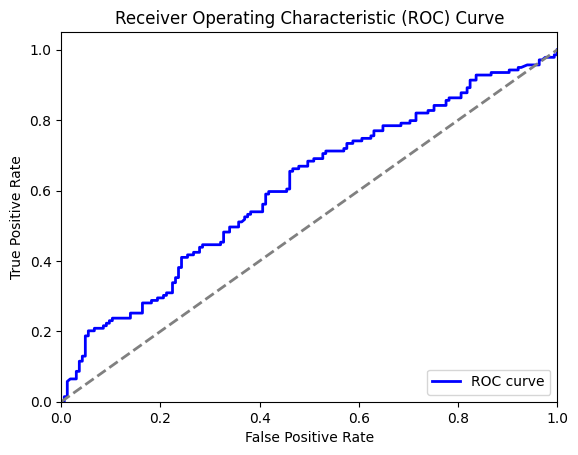

AUC: 0.6089165031611075


In [123]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(f'AUC: {roc_auc}')

# CART

## CART model with default parameters

In [104]:
# Create the CART model
cart_model = DecisionTreeClassifier(random_state=42)
# cp = 0.0 in default (will be as complex as necessary)

# Train the model
cart_model.fit(X_train, y_train)

# Make predictions
y_pred_cart = cart_model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred_cart))
print(classification_report(y_test, y_pred_cart))

[[105  60]
 [ 71  68]]
              precision    recall  f1-score   support

           0       0.60      0.64      0.62       165
           1       0.53      0.49      0.51       139

    accuracy                           0.57       304
   macro avg       0.56      0.56      0.56       304
weighted avg       0.57      0.57      0.57       304



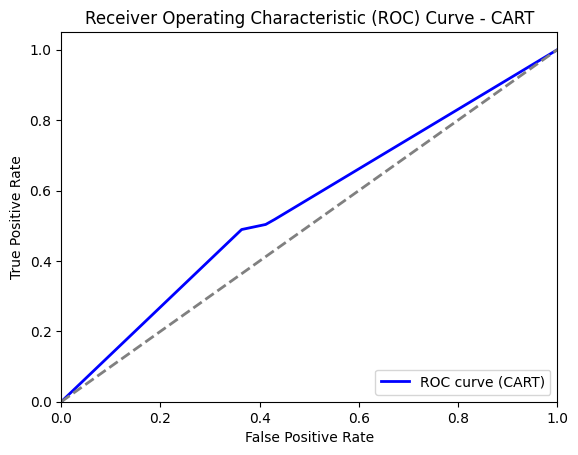

AUC (CART): 0.554698059734031


In [105]:
# Calculate the ROC curve
fpr_cart, tpr_cart, thresholds_cart = roc_curve(y_test, cart_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure()
plt.plot(fpr_cart, tpr_cart, color='blue', lw=2, label='ROC curve (CART)')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - CART')
plt.legend(loc="lower right")
plt.show()

# Calculate the AUC
roc_auc_cart = auc(fpr_cart, tpr_cart)
print(f'AUC (CART): {roc_auc_cart}')

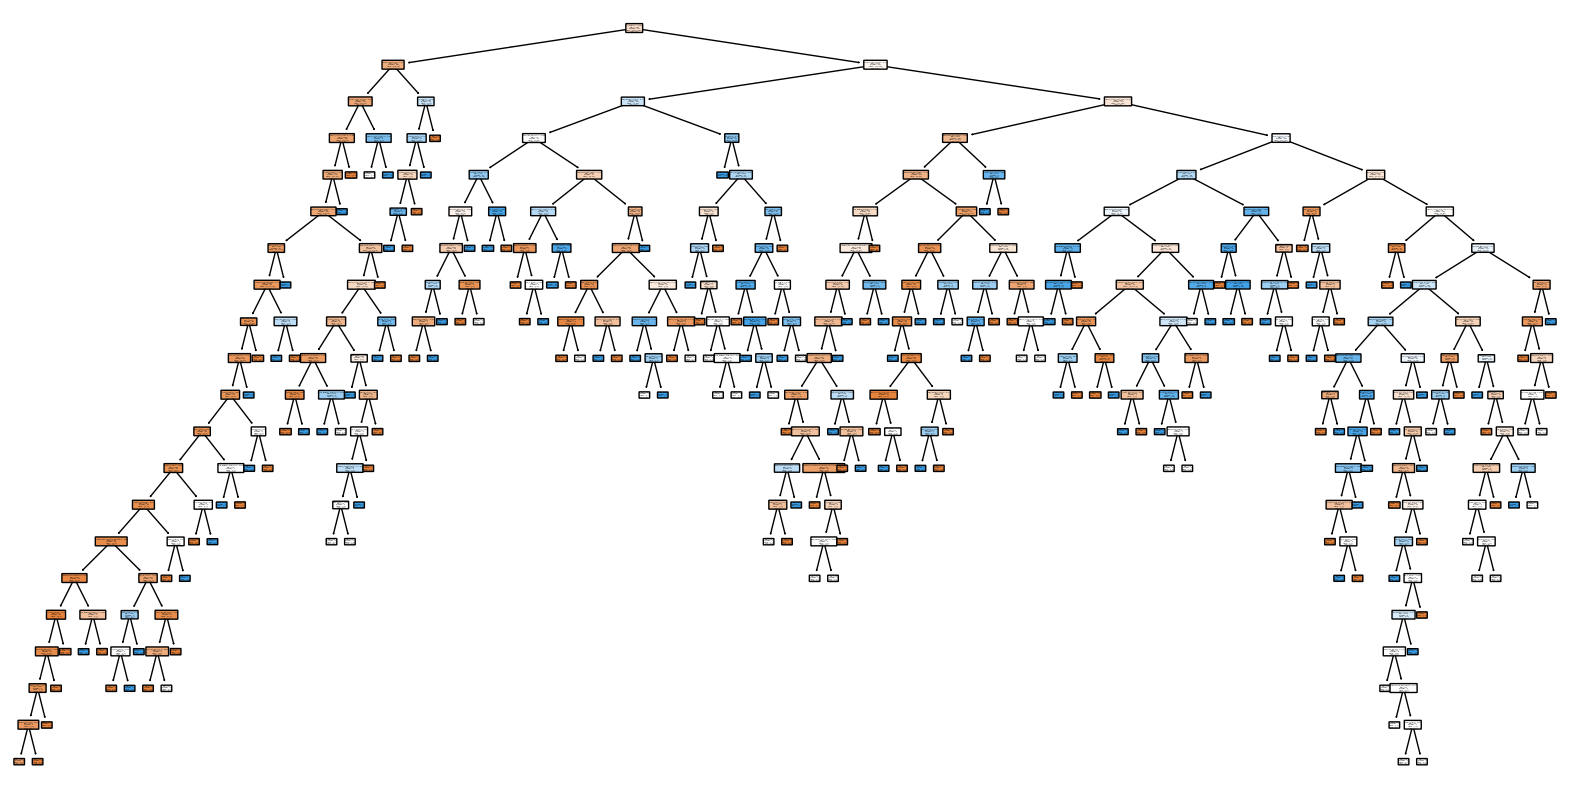

In [106]:
plt.figure(figsize=(20, 10))
plot_tree(cart_model, feature_names=X.columns, class_names=['lost', 'won'], filled=True, rounded=True)
plt.show()

## CART model with cross validation on cp

In [112]:
# Define the parameter grid
param_grid = {'ccp_alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5]}

# Create the CART model
cart_model = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(cart_model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_cart_model = grid_search.best_estimator_

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Best parameters: {'ccp_alpha': 0.1}
Best cross-validation score: 0.5770824949698189


# Random Forest

# Boosted Trees

# Neural Network